# Impoting libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

# Loading the data

In [2]:
data = pd.read_csv('/kaggle/input/alzheimers-prediction-dataset-global/alzheimers_prediction_dataset.csv')

In [3]:
data.head(3)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No


# Checking for missing data

In [4]:
data.isna().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

# Converting categorical data to numerical

In [5]:
Categorical_columns = data.select_dtypes(include=['object', 'category']).columns

In [6]:
def mapping_to_num(data, column):
    mapping = {category: idx for idx, category in enumerate(data[column].astype('category').cat.categories)}
    data[column] = data[column].map(mapping)
    return data, mapping

In [7]:
mappings_dict = {}
columns_to_map = Categorical_columns
for col in columns_to_map:
    data, mapping = mapping_to_num(data, col)
    mappings_dict[col] = mapping

# Splitting data

In [8]:
X = data.drop(columns=['Alzheimer’s Diagnosis'])
y = data['Alzheimer’s Diagnosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree classifier

In [10]:
model = DecisionTreeClassifier(criterion='entropy', 
    max_depth=10, 
    min_samples_split=4, 
    min_samples_leaf=2,
    max_features='auto',
    class_weight='balanced',
    random_state = 0)

# Train the classifier
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


## Accuracy Score

In [11]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7103881534664572


## Classification Report

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74     13065
           1       0.63      0.74      0.68      9220

    accuracy                           0.71     22285
   macro avg       0.71      0.71      0.71     22285
weighted avg       0.72      0.71      0.71     22285



## Confuion Matrix

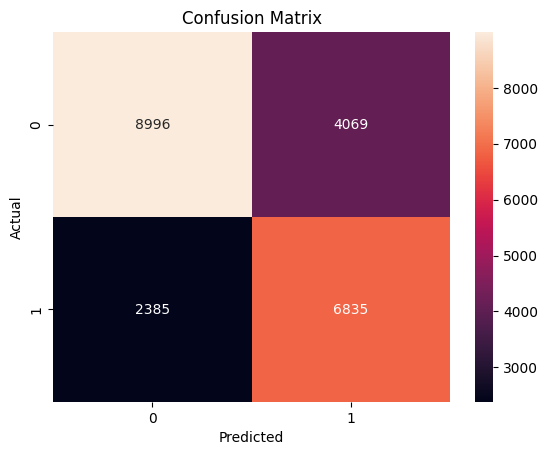

In [13]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Gradient Boosting Machine

In [14]:
gbm_model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.098, max_depth=80, random_state=42)
gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)

## Classification Report

In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.69     13065
           1       0.56      0.55      0.55      9220

    accuracy                           0.64     22285
   macro avg       0.62      0.62      0.62     22285
weighted avg       0.63      0.64      0.63     22285



## Confusion Matrix

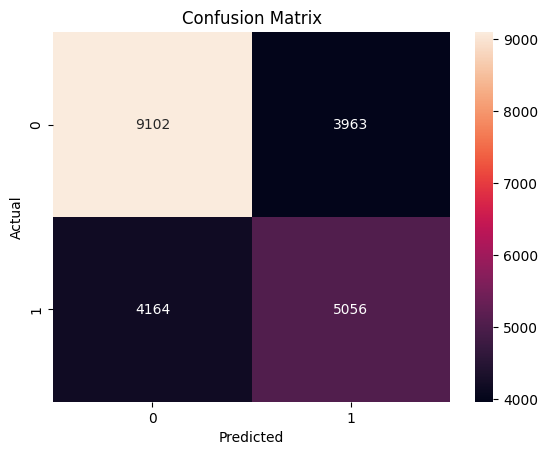

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()